In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(20).reshape((10, 2)), range(10)        # 신기한 
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(y_train, y_test)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
range(0, 10)
[0, 3, 1, 7, 8, 5] [2, 9, 6, 4]


3. RMSE (Root Mean Squared Error)

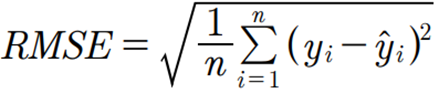

RMSE 구하기: 주의! MSE 한 다음에 root 씌우기

4. R-squared

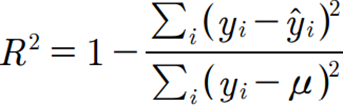

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0

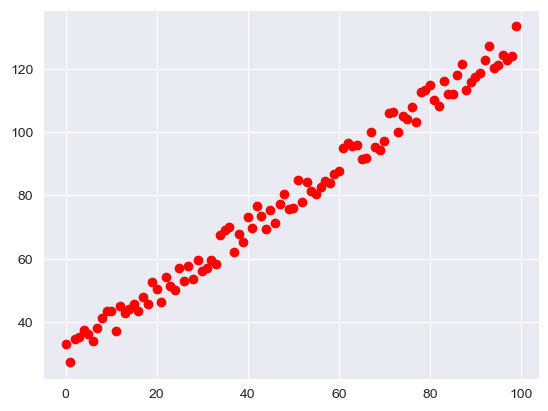

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

# 임의의 데이터 생성 후 시각화
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    print(x)
    print(y)

    for i in range(0, numPoints):
        x[i][0] = 1 # (2) 데이터 x의 상수항에는 1
        x[i][1] = i # (3) 데이터 x 값은 1씩 증가시킴
        y[i] = (i + bias) + random.uniform(0, 1) * variance
        # (4) 데이터 y에 bias 생성
    return x, y

# x, y = gen_data(100, 0, 0)    # (1) 100개의 데이터 생성
# x, y = gen_data(100, 25, 0)
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 1], y, "ro")    # (5) 데이터 x와 y의 상관관계 그래프 작성, red + 'o' marker
# plt.scatter(x[:,1], y, c='r')
plt.show()

In [3]:
# 경사 하강법을 사용하여 선형 회귀 모델의 파라미터(가중치)를 업데이트 하는 함수를 정의
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []                               # (5) theta (파라메터)를 주기마다 저장할 리스트
    cost_list = []                                # (6) cost (비용)을 매 주기마다 저장할 리스트
    for i in range(0, numIterations):             # (7) 반복 횟수만큼 반복합니다.
        # dot(): 벡터 내적을 수행
        hypothesis = np.dot(x, theta)             # (8) y=b+a*x=theta[0]*x[][0] + theta[1]*x[][1]
        loss = hypothesis - y                     # (9) loss (손실) 계산
        cost = np.sum(loss ** 2) / (2 * m)        # (10) cost (비용) 계산
        gradient = np.dot(xTrans, loss) / m       # (11) 경사 (gradient) 계산
        theta = theta - alpha * gradient          # (12) 경사 (gradient) 방향으로  alpha만큼 이동해서 업데이트
        if i % 250 == 0:                          # (13) 250번마다 thetha와 cost 값을 리스트에 저장해둔다
            theta_list.append(theta)
        cost_list.append(cost)
    return theta, np.array(theta_list), cost_list # (14) 최종결과 (theta), 중간 과정 중 theta와 cost 값 저장 리스트 반환

m, n = np.shape(x)   # (1) m: data 개수, n: model parameter 개수
numIterations = 20000 # (2) 반복횟수 지정
alpha = 0.0005       # (3) 학습률 (learning rate) 지정
theta = np.ones(n)   # (4) 가중치 (weight / 모델파라메터)의 초기값 지정

print(m, n)

theta, theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, numIterations)

100 2


In [4]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

result = A.dot(B)       # 행렬과 행렬의 곱

print(result)
# 출력:
# [[19 22]
#  [43 50]]


[[19 22]
 [43 50]]


In [5]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

result = np.dot(v1, v2)     # 벡터의 내적

print(result)
# 출력: 32 (1*4 + 2*5 + 3*6)

32


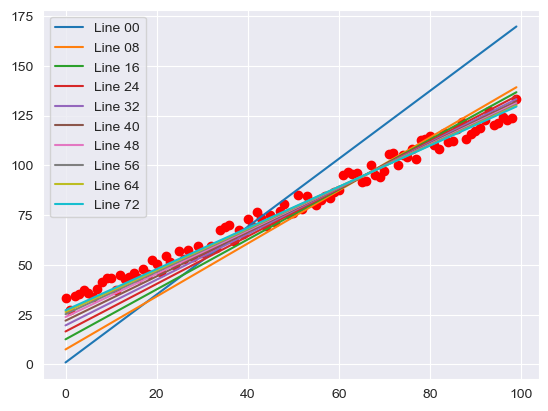

In [6]:
y_predict_step= np.dot(x, theta_list.transpose())       # 행렬로 변 

plt.plot(x[:, 1], y, "ro")      # 원본 데이터를 빨간색 점으로 플로팅

# 8개씩 건너뛰면서 모델 예측을 플로팅. 각각의 theta 값에 대해 모델이 생성한 예측을 선으로 그림
for i in range (0, 80, 8):
    plt.plot(x[:, 1], y_predict_step[:, i], label='Line %02d'%i)

plt.legend()        # 각 선에 대한 레이블 표시
plt.show()